# Trabajo Práctico 2 - Matrices Insumo-Producto

In [111]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
import numpy as np
import scipy.linalg as lng
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from funciones import *


## Consigna 1

Sean $A$ una matriz cuadrada e $I$ la matriz identidad tales que 
$$
(I-A)^{-1} = I + A + A² + A³ + ... + A^n + ...
$$
$$
(I-A)^{-1}=I + \sum_{i=1}^{\infty} A^{i}
$$
Queremos probar que entonces
$$
\lim_{n \to \infty} A^{n+1} = 0
$$


### Demostración

Expresando la serie como límite, obtenemos que
$$
(I-A)^{-1}=I + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i}
$$
$$
\implies (I-A)^{-1}(I-A)=(I + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i})(I-A) = I
$$
$$
\implies I - A + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i}(I-A) = I
$$
$$
\implies I - A + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i} - A^{i+1} = I
$$
$$
\implies \lim_{n \to \infty} A - A^{2} + A^{2} - A^{3} + ... + A^{n} -A^{n+1} = A
$$
$$
\implies \lim_{n \to \infty} A - A^{n+1} = A
$$
$$
\implies A - \lim_{n \to \infty} A^{n+1} = A
$$
$$
\implies \lim_{n \to \infty} A^{n+1} = 0
$$

## Consigna 2

Usamos un for para obtener las potencias de las matrices para cada exponente n y vamos guardando las normas usando scipy.linalg.norm. 

In [9]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

N = 250

a1 = np.zeros(N)
a2 = np.zeros(N)


converge_A1 = False 
converge_A2 = False 
for i in range(N):
    A1_n = np.linalg.matrix_power(A1,i+1)
    a1[i] = lng.norm(A1_n,2)
    A2_n = np.linalg.matrix_power(A2,i+1)
    a2[i] = lng.norm(A2_n,2)
    if i>0: 
        A1_anterior = np.linalg.matrix_power(A1,i)
        A2_anterior = np.linalg.matrix_power(A2,i)
        #Vemos si la diferencia entre la matriz de la iteración anterior y la actual es casi nula
        tol = 1e-6  
        if not converge_A1 and lng.norm(A1_anterior - A1_n, ord=2) < tol:
            print(f"La sucesión A1^n converge a \n {A1_n} \n a partir de la iteración {i}.")
            converge_A1 = True
        if not converge_A2 and lng.norm(A2_anterior - A2_n, ord=2) < tol:
            print(f"La sucesión A2^n converge a \n {A2_n} \n a partir de la iteración {i}.")
            converge_A2 = True

La sucesión A1^n converge a 
 [[0.21975885 0.21975891 0.21975886 0.2197589  0.21975884]
 [0.20223855 0.20223851 0.20223855 0.20223852 0.20223855]
 [0.19613795 0.19613796 0.19613795 0.19613796 0.19613794]
 [0.1053852  0.10538518 0.1053852  0.10538518 0.1053852 ]
 [0.27647945 0.27647944 0.27647945 0.27647944 0.27647945]] 
 a partir de la iteración 12.
La sucesión A2^n converge a 
 [[2.08762143e-06 2.80476850e-06 3.37209232e-06 3.09342428e-06
  3.17185504e-06]
 [1.80466502e-06 2.42460991e-06 2.91503860e-06 2.67414125e-06
  2.74194150e-06]
 [1.82821589e-06 2.45625106e-06 2.95307985e-06 2.70903879e-06
  2.77772383e-06]
 [1.01632303e-06 1.36545390e-06 1.64164586e-06 1.50598106e-06
  1.54416374e-06]
 [1.91969096e-06 2.57914997e-06 3.10083766e-06 2.84458598e-06
  2.91670768e-06]] 
 a partir de la iteración 150.


A continuación, graficamos los vectores $a_1$ y $a_2$ definidos de la siguiente manera: $a_1(n)= ||A_1^n||_2$, $a_2(n)= ||A_2^n||_2$.


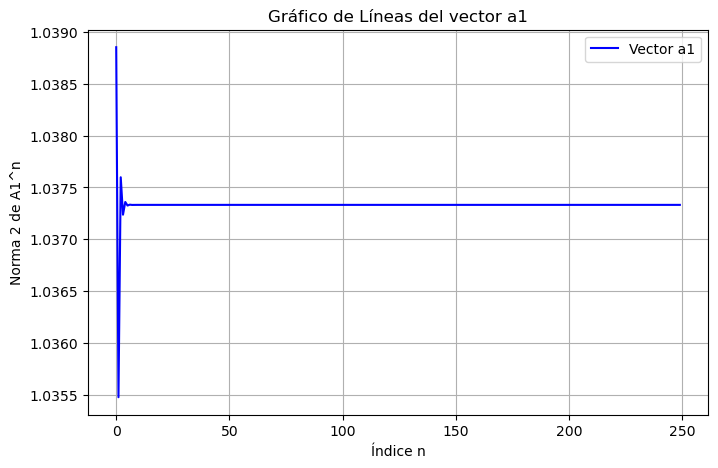

In [113]:
# Graficamos el vector a1
plt.figure(figsize=(8, 5))
plt.plot(a1, label='Vector a1', color='blue', linestyle='-')  # Línea para a1

plt.title('Gráfico de Líneas del vector a1')
plt.xlabel('Índice n')
plt.ylabel('Norma 2 de A1^n')

plt.legend()
plt.grid(True)
plt.show()

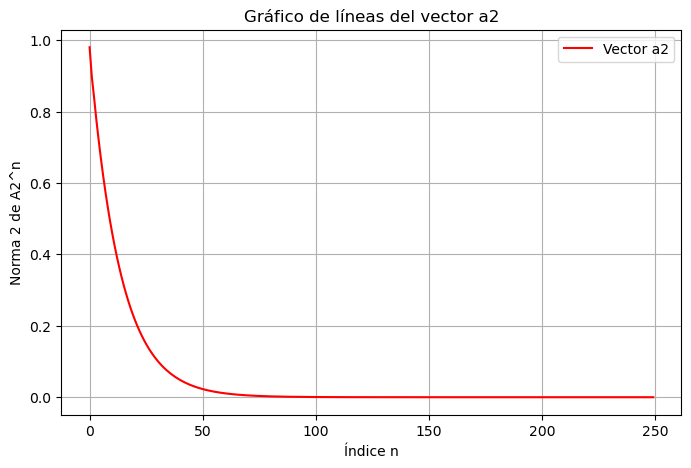

In [12]:
#Graficamos el vector a2
plt.figure(figsize=(8, 5))

plt.plot(a2, label='Vector a2', color='red', linestyle='-')   
plt.title('Gráfico de líneas del vector a2')
plt.xlabel('Índice n')
plt.ylabel('Norma 2 de A2^n')

plt.legend()
plt.grid(True)
plt.show()

Del primer gráfico se observa que la norma 2 de la matriz $A_1$ oscila entre 1.0355 y 1.0390 en aproximadamente sus primeras 10 potencias, luego $||A_1^n||_2$ se mantiene, por lo que la norma de la matriz parece converger a 1.0373. Numéricamente observamos que esto sucede porque a partir de $n=12$ la matriz $A_1^n$ permanece invariante. Por otro lado, en el segundo gráfico se ve que la norma de la matriz $||A_2^n||_2$ cae rápidamente desde el inicio y parece converger a 0, esto sucede si y solo si la matriz $A_2^n$ tiende a la matriz nula cuando $n$ crece.

## Consigna 3

Empleamos el método de Monte Carlo para realizar 250 repeticiones del cálculo del autovalor de módulo máximo, utilizando el método de la potencia. Esto nos permite obtener estadísticamente el autovalor máximo de las matrices $A_1$ y $A_2$. Para visualizar los resultados, graficamos una tabla:

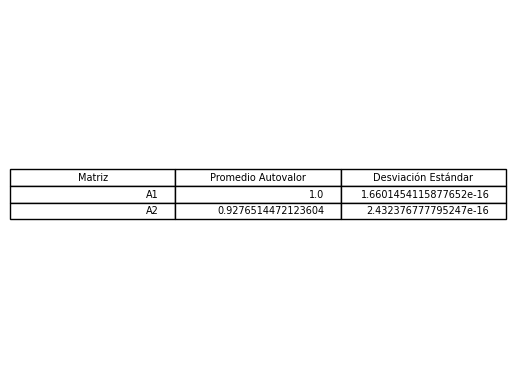

In [115]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])
promedio_A1, desviacion_A1 = monteCarlo(A1, 250)
promedio_A2, desviacion_A2 = monteCarlo(A2, 250)

data = [['A1',promedio_A1, desviacion_A1],['A2',promedio_A2, desviacion_A2]]

#Graficamos una tabla con los resultados del método Monte Carlo
fig, ax = plt.subplots()
table = ax.table(cellText=data, colLabels=['Matriz', 'Promedio Autovalor', 'Desviación Estándar'], loc='center')
ax.axis('off')
plt.show()


## Consigna 4

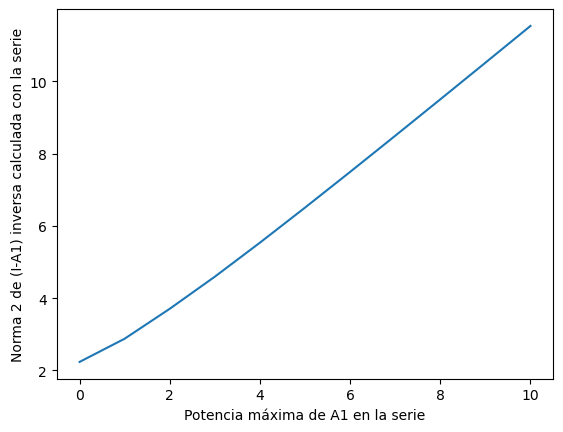

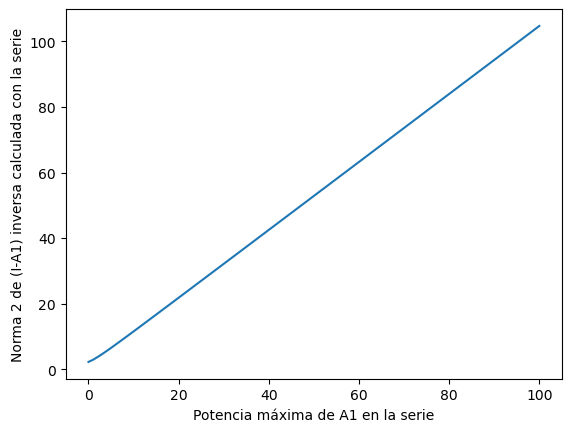

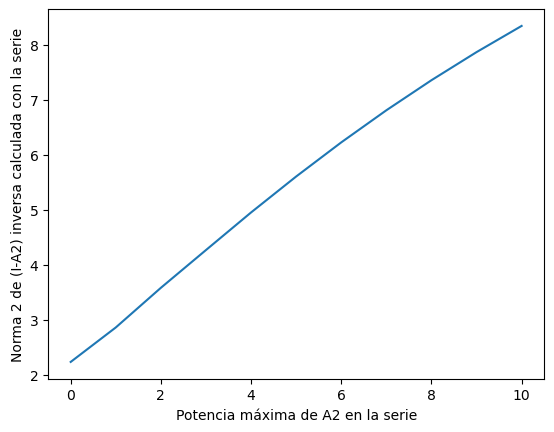

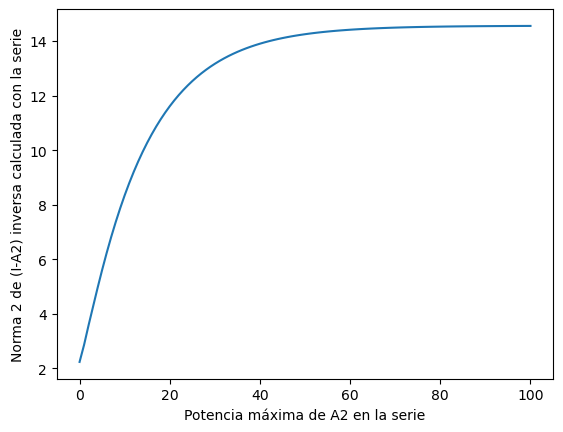

In [118]:
# gráficos
# n = 10 y A1
X , Y = normas_de_series_de_potencias(A1,10)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A1 en la serie")
plt.ylabel("Norma 2 de (I-A1) inversa calculada con la serie")
plt.show()


# n = 100 y A1
X , Y = normas_de_series_de_potencias(A1,100)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A1 en la serie")
plt.ylabel("Norma 2 de (I-A1) inversa calculada con la serie")
plt.show()
    

# n = 10 y A2
X , Y = normas_de_series_de_potencias(A2,10)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A2 en la serie")
plt.ylabel("Norma 2 de (I-A2) inversa calculada con la serie")
plt.show()


# n = 100 y A2
X , Y = normas_de_series_de_potencias(A2,100)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A2 en la serie")
plt.ylabel("Norma 2 de (I-A2) inversa calculada con la serie")
plt.show()


b)
Del código de la consigna 2 obtenemos que: 

La sucesión \($ A_1^n$ \) converge a aproximadamente
\[
\begin{bmatrix}
0.21975885 & 0.21975891 & 0.21975886 & 0.2197589 & 0.21975884 \\
0.20223855 & 0.20223851 & 0.20223855 & 0.20223852 & 0.20223855 \\
0.19613795 & 0.19613796 & 0.19613795 & 0.19613796 & 0.19613794 \\
0.1053852  & 0.10538518 & 0.1053852  & 0.10538518 & 0.1053852  \\
0.27647945 & 0.27647944 & 0.27647945 & 0.27647944 & 0.27647945 \\
\end{bmatrix}
\]
a partir de la iteración 12.

La sucesión \( $A_2^n$ \) converge a aproximadamente 
\[
\begin{bmatrix}
2.0876 \times 10^{-6} & 2.8048 \times 10^{-6} & 3.3721 \times 10^{-6} & 3.0934 \times 10^{-6} & 3.1719 \times 10^{-6} \\
1.8047 \times 10^{-6} & 2.4246 \times 10^{-6} & 2.9150 \times 10^{-6} & 2.6741 \times 10^{-6} & 2.7419 \times 10^{-6} \\
1.8282 \times 10^{-6} & 2.4563 \times 10^{-6} & 2.9531 \times 10^{-6} & 2.7090 \times 10^{-6} & 2.7777 \times 10^{-6} \\
1.0163 \times 10^{-6} & 1.3655 \times 10^{-6} & 1.6416 \times 10^{-6} & 1.5060 \times 10^{-6} & 1.5442 \times 10^{-6} \\
1.9197 \times 10^{-6} & 2.5791 \times 10^{-6} & 3.1008 \times 10^{-6} & 2.8446 \times 10^{-6} & 2.9167 \times 10^{-6} \\
\end{bmatrix}
\] (Podríamos decir que converge a la matriz nula)
a partir de la iteración 150.


De los gráficos del subpunto anterior se puede observar como al parecer la serie diverge para A1, mientras que converge para A2 (a una matriz de norma 14,5 aprox). Sabemos además que esto efectivamente va a ser asi por la propiedad dada en el subpunto c) , ya que $\rho(A1) = 1$ y $\rho(A2) ≈ 0.93 < 1$ (valores calculados en el punto 3 al calcular el autovalor de módulo máximo).

c) La serie infinita $I + A + A^2 + A^3 + ... + A^n + ...$ converge a $(I-A)^{-1}$ si y solo si el módulo del autovalor de módulo máximo de A $(\rho (A))$ es menor estricto que 1. 
Demostración: <br>
Por la consigna 1, $(I-A)^{-1} = I + A + A^{2} + ... + A^{n} + ...  \iff \lim_{n \to \infty} A^{n+1} = 0 $<br>
y
$$
\lim_{n \to \infty} A^{n+1} = 0 \iff \lim_{n \to \infty} A^{n} =  0 \iff \lim_{n \to \infty} ||A^{n}|| = 0 $$
Por la proposición 5.15 del apunte, 
$$\lim_{n \to \infty} ||A^{n}|| = 0 \iff  \rho(A) < 1$$
De esta cadena de equivalencias se conluye que $(I-A)^{-1} = I + A + A^2 + A^3 + ... + A^n + ... \iff \rho(A) < 1$
$ \Box$

d)


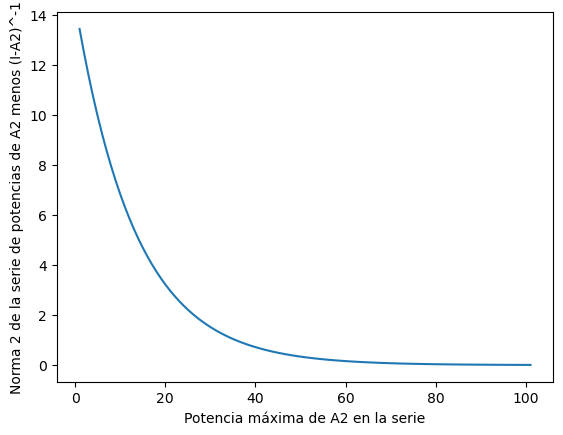

In [120]:
# Graficamos y calculamos el vector de error solo para A2 porque es la única matriz para la que converge la serie


# calculamos el vector de error
I = np.eye(A2.shape[0])
L,U,P = calcularLU(I-A2)
inversa = inversaLU(L,U,P)
aproximacion_inversa = I
e_n = []
indices = []
for i in range(1,100 + 2):
    e_n.append(np.linalg.norm(aproximacion_inversa - inversa,2))
    indices.append(i)
    aproximacion_inversa += np.linalg.matrix_power(A2,i)

# graficamos el vector
plt.plot(indices,e_n)
plt.xlabel("Potencia máxima de A2 en la serie")
plt.ylabel("Norma 2 de la serie de potencias de A2 menos (I-A2)^-1")
plt.show()

Como era de esperarse, se puede ver en el gráfico que el error tiende a 0 a medida que aumenta la maxima potencia de la serie, ya que esta converge a $(I-A_{2})^{-1}$. 

## Consigna 5

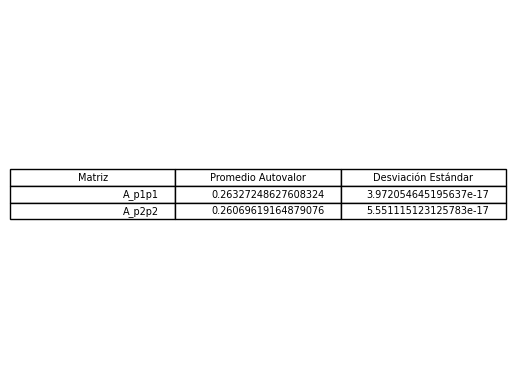

In [122]:
data = '../data/matrizlatina2011_compressed_0.xlsx'

p1 ='SLV'
p2= 'NIC'
df = pd.read_excel(data, sheet_name='LAC_IOT_2011')
df = df.loc[(df['Country_iso3'] == p1) | (df['Country_iso3']==p2)] # Nos quedamos con las filas correspondientes a p1 y p2

df_con_sectores = df[[col for col in df.columns if (col.startswith(p1) or col.startswith(p2) or col == 'Country_iso3' or col =='Sector' or col == 'Output' )]]
# Me guardo el df con los nombres de los sectores para el pto 10

df = df[[col for col in df.columns if (col.startswith(p1) or col.startswith(p2) or col == 'Country_iso3' or col == 'Output')]] # Nos quedamos con las columnas de los paises p1,p2 y con la de la producción

#Genero la matriz de coeficientes técnicos intraregional del país p1
p1_df = df.loc[df['Country_iso3'] == p1] 
z_p1p1 = p1_df[[col for col in p1_df.columns if col.startswith(p1)]] # Obtengo la matriz insumo-producto intrarregional
producto_p1 = p1_df['Output'].copy() # tomo la producción de los sectores del pais p1
producto_p1 = producto_p1.replace(0,1) # Reemplazamos los 0 por 1 para no dividir por 0 al calcular la inversa de P (matriz diagonal con la producción)
producto_p1_reciprocos = []
for elem in producto_p1:
    producto_p1_reciprocos.append(1/elem) # Guardo los reciprocos de las producciones 
inversa_producto_p1 = np.diag(producto_p1_reciprocos) # Armo la inversa de P que es igual a P pero con los recíprocos en la diagonal
A_p1p1 = z_p1p1.dot(inversa_producto_p1) # Calcula la matriz de coeficientes técnicos 
A_p1p1 = A_p1p1.to_numpy()

#Genero la matriz de coeficientes técnicos intraregional del país p2
p2_df = df.loc[df['Country_iso3'] == p2] 
z_p2p2 = p2_df[[col for col in p2_df.columns if col.startswith(p2)]] 
producto_p2 = p2_df['Output'].copy()
producto_p2 = producto_p2.replace(0,1)
producto_p2_reciprocos = []
for elem in producto_p2:
    producto_p2_reciprocos.append(1/elem)
inversa_producto_p2 = np.diag(producto_p2_reciprocos)
A_p2p2 = z_p2p2.dot(inversa_producto_p2) # Matriz de coeficientes técnicos
A_p2p2 = A_p2p2.to_numpy()

promedio_A_p1p1, desviacion_A_p1p1 = monteCarlo(A_p1p1, 250)
promedio_A_p2p2, desviacion_A_p2p2 = monteCarlo(A_p2p2, 250)

data = [['A_p1p1',promedio_A_p1p1, desviacion_A_p1p1],['A_p2p2',promedio_A_p2p2, desviacion_A_p2p2]]

#Graficamos una tabla con los resultados del método Monte Carlo
fig, ax = plt.subplots()
table = ax.table(cellText=data, colLabels=['Matriz', 'Promedio Autovalor', 'Desviación Estándar'], loc='center')
ax.axis('off')
plt.show()


En la tabla anterior observamos que tanto el máximo autovalor de $A_{p1p1}$ como el de $A_{p2p2}$ es menor que 1. Por lo tanto, según el punto 4c, se concluye que las series de potencias de cada una de estas matrices son convergentes.

## Consigna 6

Sea $n \geq 2$ y $E_n \in \mathbb{R}^{n \times n}$ una matriz definida como $E_n = I_n - \frac{1}{n}ee^t$ donde $e\in \mathbb{R}^n$ es un vector columna de todos 1s y $I_n$ es la matriz identidad de $n\times n$

a) Tenemos que 
$$
E_n = I_n - \frac{1}{n}ee^t= \begin{bmatrix}
1 - \frac{1}{n} & -\frac{1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n} \\
-\frac{1}{n} & 1 - \frac{1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n} \\
-\frac{1}{n} & -\frac{1}{n} & 1 - \frac{1}{n} & \cdots & -\frac{1}{n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
-\frac{1}{n} & -\frac{1}{n} & -\frac{1}{n} & \cdots & 1 - \frac{1}{n}
\end{bmatrix}
$$

Sea $z \in \mathbb{R}^n$, 
$$
\implies E_nz = (I_n - \frac{1}{n}ee^t )z = z - \frac{1}{n} (\sum_{i=1}^n z_i)e = z - promedio(z)e
$$

Es decir que hacer la operación $E_nz$ centra al vector $z$ al restarle el promedio de sus componentes a cada componente.
Luego, calculando el promedio de las componentes del vector $E_nz$ obtenemos:
$$
promedio(E_nz)= \frac{1}{n} \sum_{i=1}^n (z_i - promedio(z)) = \frac{1}{n} \sum_{i=1}^n z_i - \frac{1}{n} \sum_{i=1}^n  promedio(z) 
$$
$$
\implies promedio(E_nz)= \frac{1}{n} \sum_{i=1}^n z_i - \frac{1}{n} \ n \ promedio(z) = promedio(z) - promedio(z)  
$$
$$
\implies promedio(E_nz) = 0 \ \Box
$$

Concluimos que hacer $E_nA$ para una matriz $A$ de $n \times n$ resulta en la matriz cuyos vectores columna son los vectores columna de $A$ centrados, pues haciendo el producto en bloques (realizable pues $E_n \in \mathbb{R}^{n \times n}$ y $A_i \in \mathbb{R}^{n \times 1} \ \forall i=1, ..., n$) obtenemos:

$$
E_nA = E_n
\begin{pmatrix}
A_1 & A_2 & \cdots & A_n 
\end{pmatrix} = \begin{pmatrix} 
E_n A_1 & E_n A_2 & \cdots & E_n A_n 
\end{pmatrix}
$$

b)
Consideremos la acción de $E_n$ sobre un vector arbitrario $v \in \mathbb{R}^n$:
$$
E_n v = v - \frac{1}{n} e e^t v.
$$
Observamos que $ E_n v $ es igual al vector $ v $ menos su proyección en la dirección de $ e $. Esto se debe a que $ \frac{1}{n} e e^t $ actúa como una matriz de proyección en la dirección de $ e $.

Para confirmar que $ \frac{1}{n} e e^t $ es un proyector, verificamos que cumple la propiedad de idempotencia:
$$
\left( \frac{1}{n} e e^t \right)^2 = \frac{1}{n^2} (e e^t)(e e^t) = \frac{1}{n^2} (e^t e) e e^t = \frac{1}{n} e e^t,
$$
donde usamos que $ e^t e = n $, ya que $ e $ es el vector de todos unos en $ \mathbb{R}^n $. Por lo tanto, $ \frac{1}{n} e e^t $ es una matriz de proyección cuya imagen es el subespacio generado por $ e $ (esto lo vemos porque la matriz $e e^t$ tiene $n$ vectores columna iguales a $e$).

Ahora, para determinar el núcleo de $ E_n $, consideremos la condición $ E_n v = 0 $:
$$
E_n v = 0 \implies v - \frac{1}{n} e e^t v = 0 \implies v = \frac{1}{n} e e^t v.
$$
La última igualdad muestra que $ v $ debe estar en la dirección de $ e $. En otras palabras, el núcleo de $ E_n $ está dado por el subespacio generado por $ e $. 

Además, como $E_nv$ elimina la proyección de $v$ en la dirección de $e$, la imagen de $E_n$ es el subespacio ortogonal al generado por $e$.

En conclusión, demostramos que:
$$
\ker(E_n) = <e>
$$
$$
Im(E_n) = <e>^\perp
$$
Para calcular los autovalores y autovectores observamos que
$$
\forall v \in \ker(E_n) , \ \ E_nv = 0 \implies \text{v es autovector de autovalor 0}
$$
Luego $ker(E_n)$ es el autoespacio asociado al autovalor 0. Como $Dim(ker(E_n)) = 1$ entonces la multplicidad algebraica de 0 como autovalor va a ser mayor o igual que 1 (pues la multiplicidad algebraica es mayor o igual que la geométrica). <br>
Por otro lado, por el subpunto c) sabemos que $E_n$ es un proyector ortogonal, por lo tanto que deja invariante su imagen, entonces tenemos que :
$$
\forall v \in Im(E_n) , \ \ E_nv = v \implies \text{v es autovector de autovalor 1}
$$
Por lo tanto, $Im(E_{n})$ es el autoespacio asociado al autovalor 1. Dado que $Dim(Im(E_n)) = n-1 $, entonces la multiplicidad algebraica de 1 como autovalor es mayor o igual a n-1.<br>
De todo esto se deduce que la multiplicidad algebraica de 0 debe ser 1 y la de 1 debe ser n-1, pues sumadas deben dar n y no más. Además por esto mismo no va a haber mas autovalores que los mencionados.  




c) $E_n$ es una matriz de proyección ortogonal si y solo sí $E_n= E_n^t$.
\
 $E_n = I_n - \frac{1}{n}ee^t \implies$ $(E_n)_{ij}=(E_n)_{ji}= \begin{cases} 
-\frac{1}{n} & \text{si } i \neq j \\ 
1- \frac{1}{n}& \text{si } i=j 
\end{cases}$ $\implies E_n= E_n^t \implies E_n$ es una matriz de proyección ortogonal 

\
Por lo visto en el subpunto b), $E_n$ proyecta sobre el subespacio $<e>^\perp$.

d) 

-(I)$\mathbf{Falso}$. Si $E_n$ fuera ortogonal, cumpliría que $\forall x \in \mathbb{R}^n, ||E_nx||_2= ||x||_2$.  Pero, por ejemplo para $e$ esto no se cumple pues $||E_n e||_2= ||0||_2 = 0 \neq ||e||_2 = \sqrt{n}$. 

-(II)$\mathbf{Verdadero}$. Sabemos por el subpunto b) que $dim(Im(E_n))= rango(E_n)=n-1 < n$, luego $E_n$ es singular.

-(III)$\mathbf{Falso}$. Si $E_n$ fuera definida positiva, cumpliría que $\forall x \in \mathbb{R}^n, x \neq 0, x^tE_nx>0$. Pero, por ejemplo para $e$ esto no se cumple pues $E_ne = 0 \implies e^tE_ne=0$. 

-(IV)$\mathbf{Verdadero}$. $traza(E_n) = \sum_{i=1}^n (E_n)_{ii} = \sum_{i=1}^n 1 - \frac{1}{n} = n(1 - \frac{1}{n}) = n - 1$

## Consigna 7
Normalizamos la matriz $A^{rr}$ del pais p1 utilizando la ecuación $\bar{A}^{rr} = E_{40} A^{rr}$

In [123]:
I = np.eye(40) 
e = np.ones((40,1))
E_40 = I - 1/40 * e @ e.transpose()


A_rr_normalizada = E_40 @ A_p1p1 # A_p1p1 es A_rr


Calculamos la matriz de covarianzas como $C = (\bar{A}^{rr})^T  \bar{A}^{rr} / 39$

In [35]:
C = A_rr_normalizada.transpose() @ A_rr_normalizada / 39


Obtenemos los dos primeros autovalores utilizando el método de la potencia y el algoritmo de deflacion de Hotelling

In [37]:
# Obtenemos el primer autovector y autovalor
v1, lambda1 = metodo_potencia_hotelling(C,0.99999999999)
v1 = v1.reshape(40,1)

# Calculamos c'
C_prima = C - lambda1 * v1 @ v1.transpose() 


# Obtenemos el segundo autovector y autovalor
v2, lambda2 = metodo_potencia_hotelling(C_prima,0.99999999999)


## Consigna 8

Empezamos calculando la matriz de proyección con los autovectores del análisis en componentes principales:


In [440]:
M = np.column_stack((v1,v2))

Calculamos los puntos que resultan de proyectar las filas de $A^{rr}$ con la matriz, y los graficamos en un scatter de dos dimensiones:

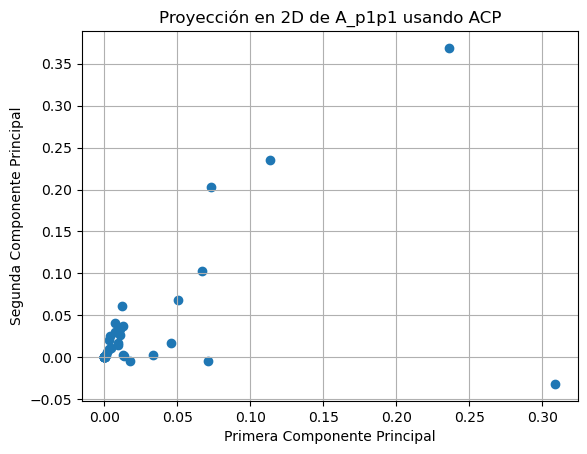

In [126]:
proyecciones_Ap1 = A_p1p1  @ M # Proyectamos las filas de A_rr

plt.scatter(proyecciones_Ap1[:,0],proyecciones_Ap1[:,1])
plt.title('Proyección en 2D de A_p1p1 usando ACP')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()


En la parte inferior izquierda del gráfico se observa una especie de cluster con una gran concentración de puntos, asi que vamos a a hacer un zoom para ver si dentro de él se forman otros clusters.  

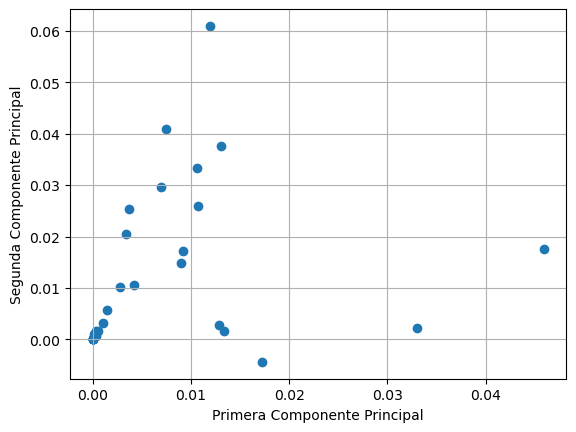

In [128]:
cluster_denso = filtrar_puntos(proyecciones_Ap1,[-1,0.05],[-1,0.075]) # Nos quedamos solo con los puntos que caen un un cierto rango
plt.scatter(cluster_denso[:,0],cluster_denso[:,1])
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()

Vemos que se forma un único cluster (parte inferior izquierda) con más de tres sectores. Por lo tanto vamos a probar con el pais $P_2$

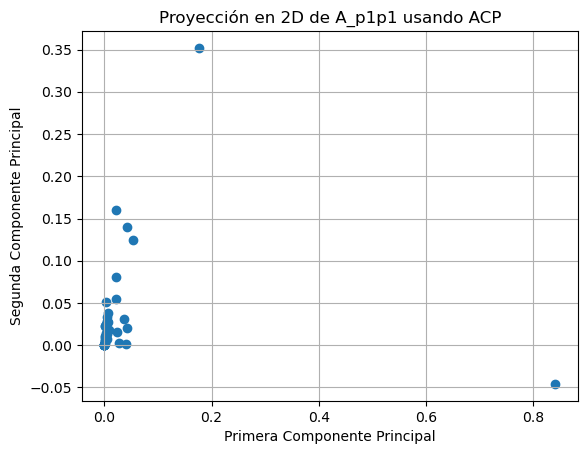

In [130]:
# Vamos a repetir los pasos para p2
I = np.eye(40) 
e = np.ones((40,1))
E_40 = I - 1/40 * e @ e.transpose()


A_ss_normalizada = E_40 @ A_p2p2 # A_p2p2 es A_ss

C = A_ss_normalizada.transpose() @ A_ss_normalizada / 39

# Obtenemos el primer autovector y autovalor
v1, lambda1 = metodo_potencia_hotelling(C,0.99999999999)
v1 = v1.reshape(40,1)
# Calculamos c'
C_prima = C - lambda1 * v1 @ v1.transpose() 

# Obtenemos el segundo autovector y autovalor
v2, lambda2 = metodo_potencia_hotelling(C_prima,0.99999999999)

M = np.column_stack((v1,v2))

proyecciones_Ap2 = (A_p2p2) @ M

plt.scatter(proyecciones_Ap2[:,0],proyecciones_Ap2[:,1])
plt.title('Proyección en 2D de A_p1p1 usando ACP')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()

Como en el caso del pais anterior, observamos que se forma un único cluster denso en la parte de abajo a la izquierda, asi que hacemos zoom para ver si encontramos clusters dentro de esa agrupación. 

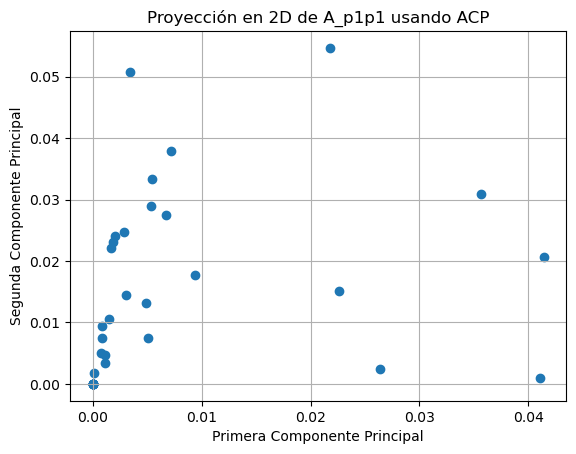

In [132]:
cluster_denso_p2 = filtrar_puntos(proyecciones_Ap2,[-1,0.07],[-1,0.07]) # Nos quedamos con los puntos de interés
plt.scatter(cluster_denso_p2[:,0],cluster_denso_p2[:,1])
plt.title('Proyección en 2D de A_p1p1 usando ACP')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()



A ojo vemos los siguientes clusters:

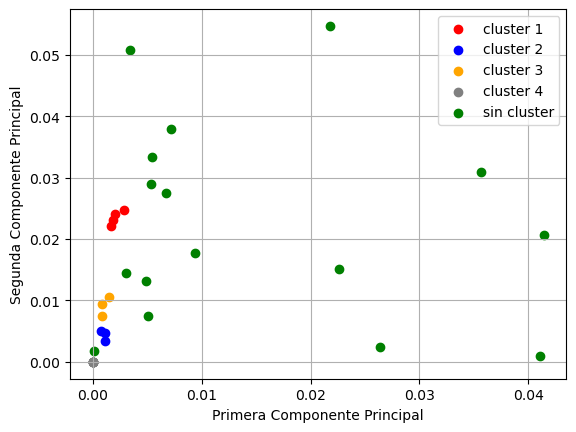

In [134]:
# Sectores correspondientes a los clusters identificados
sectores_cluster1 = [3,21,11,23]
sectores_cluster2 = [17,10,18]
sectores_cluster3 = [22,24,8]
sectores_cluster4 = [2,9,25,26,27,28,29,30]

# Puntos correspondientes a los clusters identificados
puntos_cluster1 = proyecciones_Ap2[sectores_cluster1]
puntos_cluster2 = proyecciones_Ap2[sectores_cluster2]
puntos_cluster3 = proyecciones_Ap2[sectores_cluster3]
puntos_cluster4 = proyecciones_Ap2[sectores_cluster4]

# Puntos que no caen en ningun cluster
puntos_sin_cluster = np.delete(proyecciones_Ap2,sectores_cluster1 + sectores_cluster2 + sectores_cluster3 + sectores_cluster4 , axis=0)
puntos_sin_cluster = filtrar_puntos(puntos_sin_cluster,[-1,0.07],[-1,0.07])

plt.scatter(puntos_cluster1[:,0],puntos_cluster1[:,1],color="red",label="cluster 1")
plt.scatter(puntos_cluster2[:,0],puntos_cluster2[:,1],color="blue",label="cluster 2")
plt.scatter(puntos_cluster3[:,0],puntos_cluster3[:,1],color="orange", label="cluster 3")
plt.scatter(puntos_cluster4[:,0],puntos_cluster4[:,1],color="gray", label="cluster 4")
plt.scatter(puntos_sin_cluster[:,0],puntos_sin_cluster[:,1],color="green",label="sin cluster")

plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.legend()
plt.grid(True)
plt.legend()
plt.show()

En este caso si se pueden identificar clusters de tres o más sectores. 

## Consigna 9

Por lo que se expuso en la consigna 4c, Si $\rho(A)$ < 1 vale que:<br>
$$(I-A)^{-1} = I + A + A^{2} + ... + A^{n} + ... $$ <br>
Luego H se puede escribir como:
$$H = A (I-A)^{-1} = A (I + A + A^{2} + ... + A^{n} + ...) = A + A^{2} + ... + A^{n+1} + ... $$
Es decir que H resulta igual a la suma de potencias de la consigna 1, pero sin el primer término de esta. 

## Consigna 10

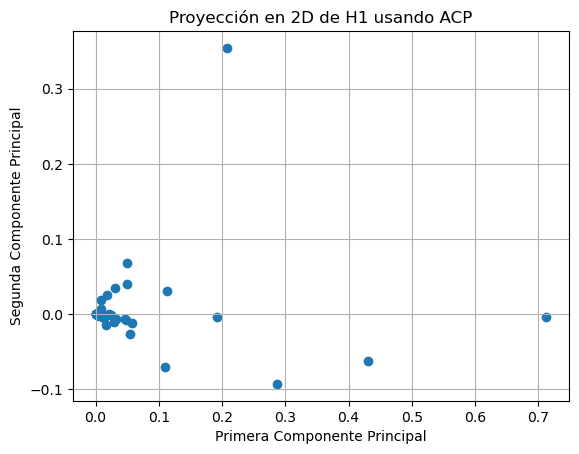

In [138]:
#Realizamos el Análisis en Componentes Principales para H1
#Obtenemos la matriz H para p1 
I = np.eye(A_p1p1.shape[0])
L,U,P = calcularLU(I-A_p1p1)
inversa1 = inversaLU(L,U,P)

H1 = A_p1p1 @ inversa1

#Usamos el método de hotelling para obtener los primeros 2 avecs y avals
n = H1.shape[0]
I = np.eye(n) 
e = np.ones((n,1))
E_n = I - 1/n * e @ e.transpose()


H1_normalizada = E_n @ H1

C = H1_normalizada.transpose() @ H1_normalizada / (n-1)

# Obtenemos el primer autovector y autovalor
v1, lambda1 = metodo_potencia_hotelling(C,0.99999999999)
v1 = v1.reshape(40,1)
# Calculamos c'
C_prima = C - lambda1 * v1 @ v1.transpose() 

# Obtenemos el segundo autovector y autovalor
v2, lambda2 = metodo_potencia_hotelling(C_prima,0.99999999999)

#Proyectamos los datos de H1 en las direcciones dadas por los avecs 
M = np.column_stack((v1,v2))

proyecciones_H1 = (H1) @ M


plt.scatter(proyecciones_H1[:,0],proyecciones_H1[:,1])
plt.title('Proyección en 2D de H1 usando ACP')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()

Vemos que aparece un cluster concentrado cerca del 0, de forma que le hacemos un zoom para identificar clusters internos

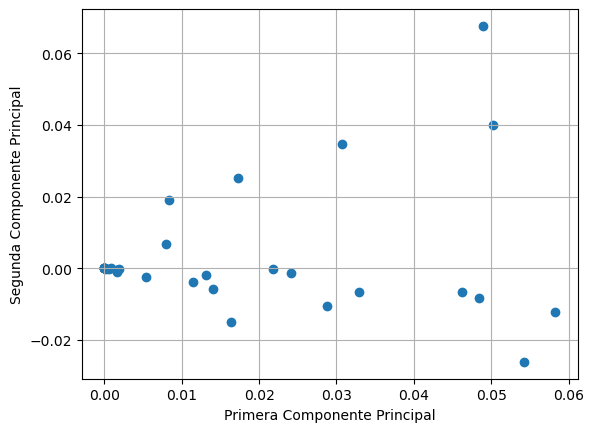

In [468]:
cluster_denso_p1 = filtrar_puntos(proyecciones_H1,[-1,0.07],[-100,100])

plt.scatter(cluster_denso_p1[:,0],cluster_denso_p1[:,1])
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()



Del gráfico observamos únicamente los siguientes 2 clusters:

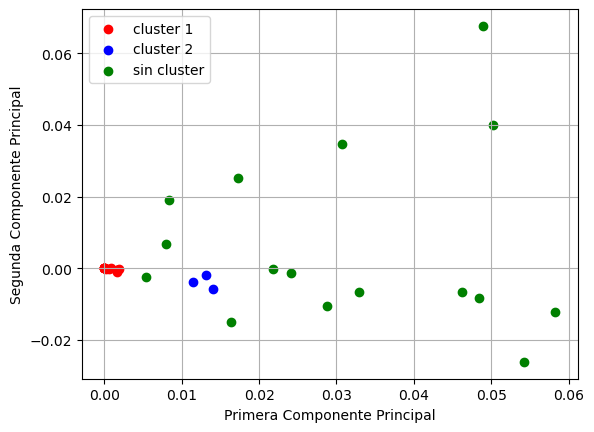

In [429]:
sectores_cluster1 = [2,9,12,15,18,22,23,25,26,27,28,29,30,31]
sectores_cluster2 = [17,8,32]

puntos_cluster1 = proyecciones_H1[sectores_cluster1]
puntos_cluster2 = proyecciones_H1[sectores_cluster2]

puntos_sin_cluster = np.delete(proyecciones_H1,sectores_cluster1 + sectores_cluster2, axis=0)
puntos_sin_cluster = filtrar_puntos(puntos_sin_cluster,[-1,0.07],[-100,100])

plt.scatter(puntos_cluster1[:,0],puntos_cluster1[:,1],color="red", label="cluster 1")
plt.scatter(puntos_cluster2[:,0],puntos_cluster2[:,1],color="blue", label="cluster 2")
plt.scatter(puntos_sin_cluster[:,0],puntos_sin_cluster[:,1],color="green",label="sin cluster")
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.legend()
plt.grid(True)
plt.legend()
plt.show()


Vemos los nombres de los sectores que se agrupan:

In [409]:
p1_con_sectores = df_con_sectores[df_con_sectores["Country_iso3"] == p1]
print("Sectores en el cluster 1")
display(p1_con_sectores.iloc[sectores_cluster1]["Sector"])
print()
print("Sectores en el cluster 2")
display(p1_con_sectores.iloc[sectores_cluster2]["Sector"])


Sectores en el cluster 1


562                        Mining and quarrying (energy)
569                                              Tobacco
572                                             Footwear
575             Coke, refined petroleum and nuclear fuel
578                                      Pharmaceuticals
582                                   Non-ferrous metals
583    Fabricated metal products, except machinery an...
585           Office, accounting and computing machinery
586              Electrical machinery and apparatus, nec
587    Radio, television and communication equipment nec
588           Medical, precision and optical instruments
589          Motor vehicles, trailers and semi-trailers 
590                              Aircraft and spacecraft
591                            Other transport equipment
Name: Sector, dtype: object


Sectores en el cluster 2


577    Other chemical products (excluding pharmaceuti...
568                                             Beverage
592     Manufacturing nec; recycling (include furniture)
Name: Sector, dtype: object

Realizamos lo mismo, pero con el pais $p_2$

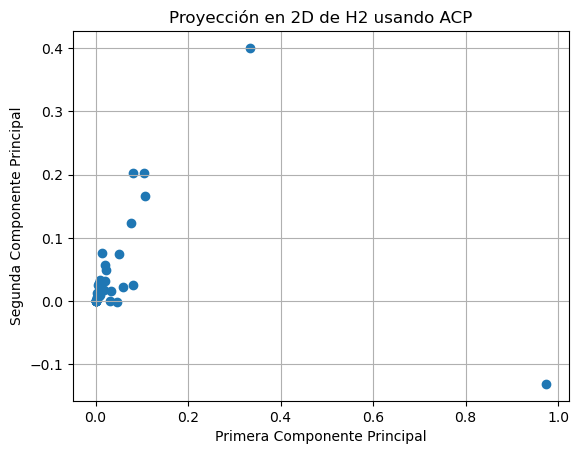

In [472]:
#Obtenemos la matriz H para p2 
I = np.eye(A_p2p2.shape[0])
L,U,P = calcularLU(I-A_p2p2)
inversa2 = inversaLU(L,U,P)

H2 = A_p2p2 @ inversa2

#Usamos el método de hotelling para obtener los primeros 2 avecs y avals
n = H2.shape[0]
I = np.eye(n) 
e = np.ones((n,1))
E_n = I - 1/n * e @ e.transpose()

H2_normalizada = E_n @ H2

C = H2_normalizada.transpose() @ H2_normalizada / (n-1)

# Obtenemos el primer autovector y autovalor
v1, lambda1 = metodo_potencia_hotelling(C,0.999)
v1 = v1.reshape(40,1)
# Calculamos c'
C_prima = C - lambda1 * v1 @ v1.transpose() 

# Obtenemos el segundo autovector y autovalor
v2, lambda2 = metodo_potencia_hotelling(C_prima,0.99)

#Proyectamos los datos de H2 en las direcciones dadas por los avecs 
M = np.column_stack((v1,v2))

proyecciones_H2 = H2 @ M

plt.scatter(proyecciones_H2[:,0],proyecciones_H2[:,1])
plt.title('Proyección en 2D de H2 usando ACP')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()




Como al proyectar $H_{2}$ vemos que se forma un cluster denso en la parte inferior izquierda, le hacemos zoom para identificar clusters en su interior:

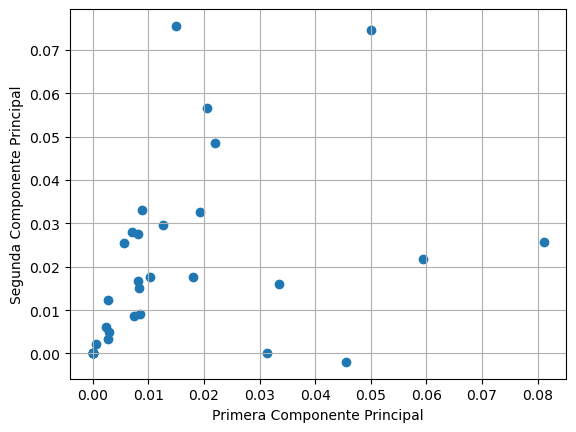

In [478]:
cluster_denso_H2 = filtrar_puntos(proyecciones_H2,[-1,0.12],[-1,0.09]) # nos quedamos solo con los puntos en un rango
plt.scatter(cluster_denso_H2[:,0],cluster_denso_H2[:,1])    # Graficamos los puntos en ese rango
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)
plt.show()



A ojo identificamos los siguientes clusters:

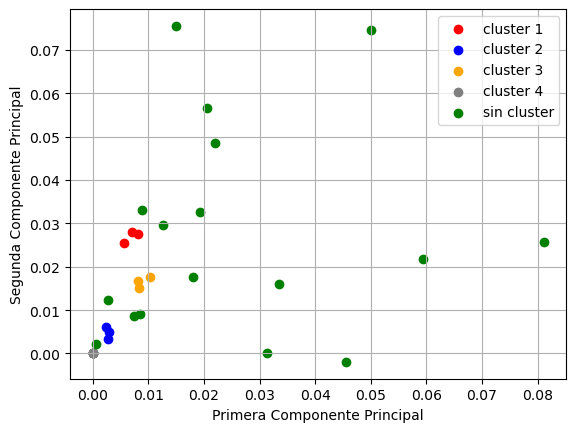

In [490]:
sectores_cluster1 = [21,11,23]
sectores_cluster2 = [17,10,18]
sectores_cluster3 = [31,14,8]
sectores_cluster4 = [2,9,25,26,27,28,29,30]


puntos_cluster1 = proyecciones_H2[sectores_cluster1]
puntos_cluster2 = proyecciones_H2[sectores_cluster2]
puntos_cluster3 = proyecciones_H2[sectores_cluster3]
puntos_cluster4 = proyecciones_H2[sectores_cluster4]

puntos_sin_cluster = np.delete(proyecciones_H2,sectores_cluster1 + sectores_cluster2 + sectores_cluster3 + sectores_cluster4 , axis=0)
puntos_sin_cluster = filtrar_puntos(puntos_sin_cluster,[-1,0.12],[-1,0.09])

plt.scatter(puntos_cluster1[:,0],puntos_cluster1[:,1],color="red", label="cluster 1")
plt.scatter(puntos_cluster2[:,0],puntos_cluster2[:,1],color="blue", label="cluster 2")
plt.scatter(puntos_cluster3[:,0],puntos_cluster3[:,1],color="orange", label="cluster 3")
plt.scatter(puntos_cluster4[:,0],puntos_cluster4[:,1],color="gray", label="cluster 4")
plt.scatter(puntos_sin_cluster[:,0],puntos_sin_cluster[:,1],color="green",label="sin cluster")

plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.legend()
plt.grid(True)
plt.legend()
plt.show()


$\textbf{Análisis del gráfico}$

vemos los nombres de los sectores agrupados:

In [379]:
p2_con_sectores = df_con_sectores[df_con_sectores["Country_iso3"] == p2]
print("Sectores en el cluster 1")
display(p2_con_sectores.iloc[sectores_cluster1]["Sector"])

print()
print("Sectores en el cluster 2")
display(p2_con_sectores.iloc[sectores_cluster2]["Sector"])
print()
print("Sectores en el cluster 3")
display(p2_con_sectores.iloc[sectores_cluster3]["Sector"])
print()
print("Sectores en el cluster 4")
display(p2_con_sectores.iloc[sectores_cluster4]["Sector"])

Sectores en el cluster 1


661                                       Iron and steel
651                                              Apparel
663    Fabricated metal products, except machinery an...
Name: Sector, dtype: object


Sectores en el cluster 2


657    Other chemical products (excluding pharmaceuti...
650                                             Textiles
658                                      Pharmaceuticals
Name: Sector, dtype: object


Sectores en el cluster 3


671               Other transport equipment
654    Pulp, paper, printing and publishing
648                                Beverage
Name: Sector, dtype: object


Sectores en el cluster 4


642                        Mining and quarrying (energy)
649                                              Tobacco
665           Office, accounting and computing machinery
666              Electrical machinery and apparatus, nec
667    Radio, television and communication equipment nec
668           Medical, precision and optical instruments
669          Motor vehicles, trailers and semi-trailers 
670                              Aircraft and spacecraft
Name: Sector, dtype: object

Como se puede ver en los sectores agrupados, estos tienden a juntarse si tienen una dinámica parecida o pertenecen a rubros similares. Por ejemplo, en el cluster 4 la mayoría de sectores se tratan de productores de maquinaria o tecnología. Otro ejemplo es el cluster 2 donde se encuentran sectores relacionados a la producción de quimicos (fármacos y no fármacos). <br>
Las agrupaciones se realizan de esta manera ya que sectores parecidos tienen dinámicas de consumo similares, que es lo que pueden reflejar las matrices de coeficientes técnicos que usamos. 

## Consigna 11

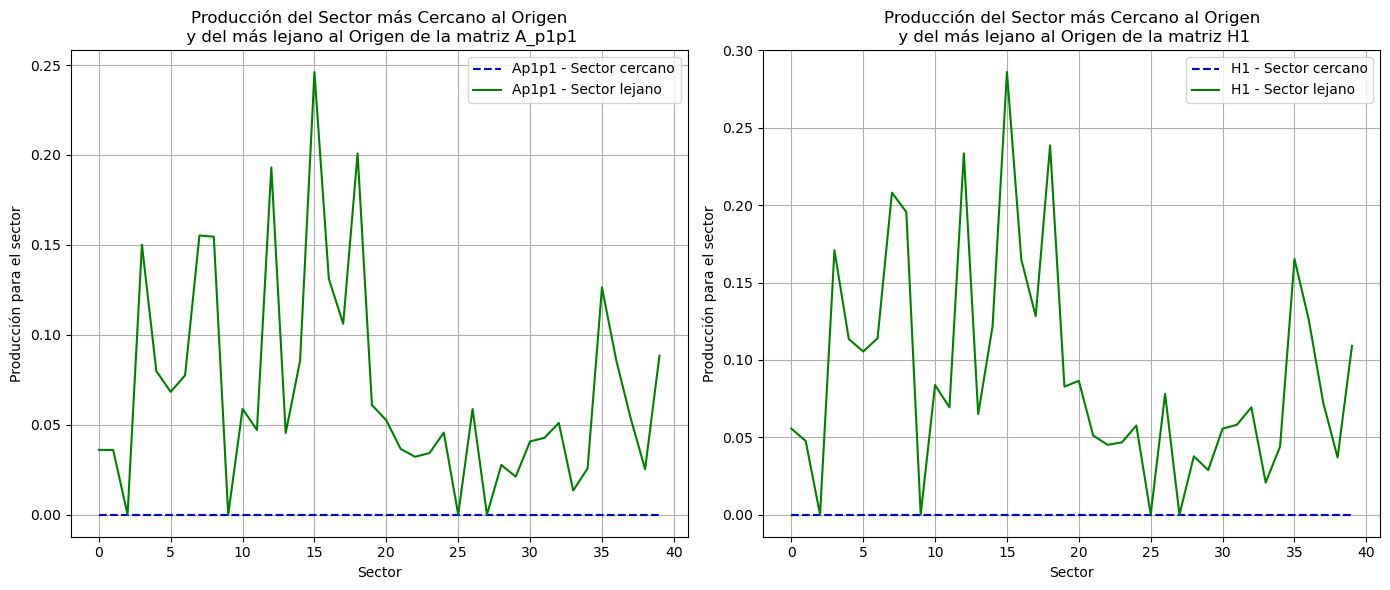

In [147]:
#Calculamos la distancia euclideana de cada punto proyectado al origen de coordenadas
distancias_Ap1 = np.sqrt(proyecciones_Ap1[:, 0]**2 + proyecciones_Ap1[:, 1]**2)
distancias_Ap2 = np.sqrt(proyecciones_Ap2[:, 0]**2 + proyecciones_Ap2[:, 1]**2)
distancias_H1 = np.sqrt(proyecciones_H1[:, 0]**2 + proyecciones_H1[:, 1]**2)
distancias_H2 = np.sqrt(proyecciones_H2[:, 0]**2 + proyecciones_H2[:, 1]**2)

#Identificamos el primer sector más cercano (porque hay varios) al origen
Ap1_IndiceCercano = np.argmin(distancias_Ap1)
Ap2_IndiceCercano = np.argmin(distancias_Ap2)
H1_IndiceCercano = np.argmin(distancias_H1)
H2_IndiceCercano = np.argmin(distancias_H2)
#Identificamos el sector más lejano al origen
Ap1_IndiceLejano = np.argmax(distancias_Ap1)
Ap2_IndiceLejano = np.argmax(distancias_Ap2)
H1_IndiceLejano = np.argmax(distancias_H1)
H2_IndiceLejano = np.argmax(distancias_H2)

#Graficamos la producción en A_p1p1 y H1 para los sectores identificados
produccion_cercano_Ap1 = A_p1p1[Ap1_IndiceCercano, :]
produccion_lejano_Ap1 = A_p1p1[Ap1_IndiceLejano, :]
produccion_cercano_H1 = H1[H1_IndiceCercano, :]
produccion_lejano_H1 = H1[H1_IndiceLejano, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subgráfico 1: A_p1p1
ax1.plot(produccion_cercano_Ap1, label='Ap1p1 - Sector cercano', linestyle='--', color='blue')
ax1.plot(produccion_lejano_Ap1, label='Ap1p1 - Sector lejano', linestyle='-', color='green')
ax1.set_title("Producción del Sector más Cercano al Origen\n y del más lejano al Origen de la matriz A_p1p1")
ax1.set_xlabel("Sector")
ax1.set_ylabel("Producción para el sector")
ax1.legend()
ax1.grid(True)

# Subgráfico 2: H1
ax2.plot(produccion_cercano_H1, label='H1 - Sector cercano', linestyle='--', color='blue')
ax2.plot(produccion_lejano_H1, label='H1 - Sector lejano', linestyle='-', color='green')
ax2.set_title("Producción del Sector más Cercano al Origen\n y del más lejano al Origen de la matriz H1")
ax2.set_xlabel("Sector")
ax2.set_ylabel("Producción para el sector")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

$\textbf{Análisis del gráfico}$

Se observa que el sector más cercano al origen está claramente diferenciado en ambas matrices, ya que tiene una producción nula en todos los sectores. En cambio, el sector más alejado muestra variaciones en la producción de cada sector, destacándose por presentar producciones no nulas en la mayoría de ellos. De este modo, concluimos que la diferencia en su proximidad al origen radica en la producción sobre otros sectores, alejándose del origen a medida que incrementa dicha producción. Matemáticamente, esto tiene sentido, ya que si el punto se encuentra en el origen, al proyectarlo, sus coordenadas permanecerán nulas.

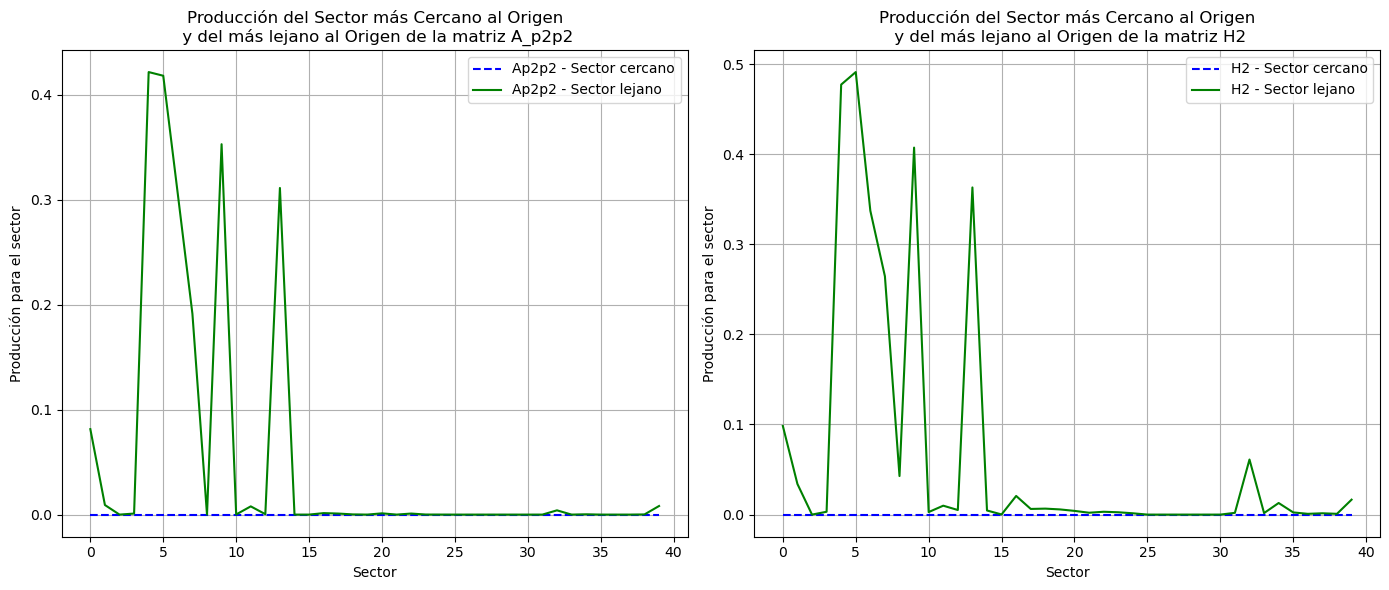

In [181]:
#Graficamos la producción en A_p2p2 y H2 para los sectores identificados
produccion_cercano_Ap2 = A_p2p2[Ap2_IndiceCercano, :]
produccion_lejano_Ap2 = A_p2p2[Ap2_IndiceLejano, :]
produccion_cercano_H2 = H2[H2_IndiceCercano, :]
produccion_lejano_H2 = H2[H2_IndiceLejano, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subgráfico 1: A_p2p2
ax1.plot(produccion_cercano_Ap2, label='Ap2p2 - Sector cercano', linestyle='--', color='blue')
ax1.plot(produccion_lejano_Ap2, label='Ap2p2 - Sector lejano', linestyle='-', color='green')
ax1.set_title("Producción del Sector más Cercano al Origen\n y del más lejano al Origen de la matriz A_p2p2")
ax1.set_xlabel("Sector")
ax1.set_ylabel("Producción para el sector")
ax1.legend()
ax1.grid(True)

# Subgráfico 1: H2
ax2.plot(produccion_cercano_H2, label='H2 - Sector cercano', linestyle='--', color='blue')
ax2.plot(produccion_lejano_H2, label='H2 - Sector lejano', linestyle='-', color='green')
ax2.set_title("Producción del Sector más Cercano al Origen\n y del más lejano al Origen de la matriz H2")
ax2.set_xlabel("Sector")
ax2.set_ylabel("Producción para el sector")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


$\textbf{Análisis del gráfico}$

De manera similar al gráfico anterior, observamos que el análisis en componentes principales ubica al sector con producción nula cerca del origen. Concluimos que la base de la diferencia en su cercanía al origen en el gráfico generado por el ACP radica en las producciones.